In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, root_mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_error as MAE

In [3]:
data = pd.read_csv('train.csv').drop(['id'],axis=1)
data

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,661.0,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.489723,0.435764,34.769578,5628.71053
14996,131.0,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.506988,0.458076,36.362837,6331.86722
14997,444.0,12.5,0.25,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.00,0.10,0.615612,0.514570,45.718182,8413.65966
14998,461.0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.551234,0.463896,38.130192,6620.09877


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  15000 non-null  float64
 1   clonesize             15000 non-null  float64
 2   honeybee              15000 non-null  float64
 3   bumbles               15000 non-null  float64
 4   andrena               15000 non-null  float64
 5   osmia                 15000 non-null  float64
 6   MaxOfUpperTRange      15000 non-null  float64
 7   MinOfUpperTRange      15000 non-null  float64
 8   AverageOfUpperTRange  15000 non-null  float64
 9   MaxOfLowerTRange      15000 non-null  float64
 10  MinOfLowerTRange      15000 non-null  float64
 11  AverageOfLowerTRange  15000 non-null  float64
 12  RainingDays           15000 non-null  float64
 13  AverageRainingDays    15000 non-null  float64
 14  fruitset              15000 non-null  float64
 15  fruitmass          

In [5]:
X = data.drop(columns=['yield'])
y = data['yield']
# Ma'lumotlarni o'qitish va test uchun ajratamiz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

C:\Users\user\AppData\Local\Temp\ipykernel_9428\4033609815.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


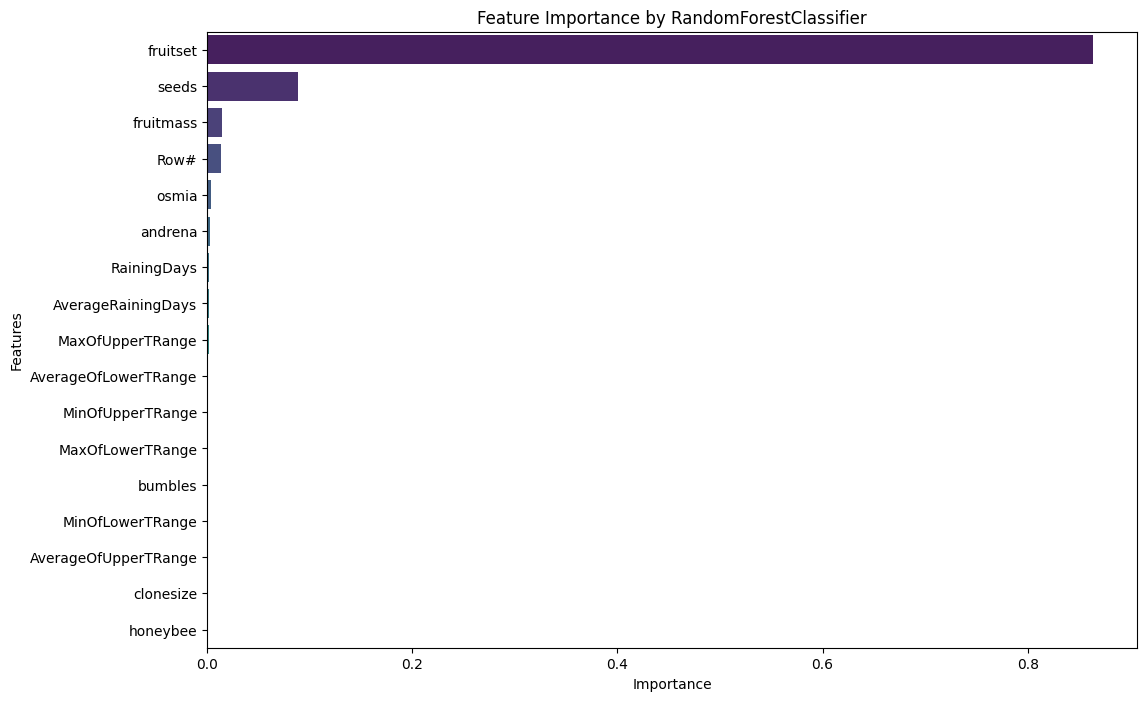

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# RandomForestClassifier modelini o'rgatish
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

# Xususiyatlarning muhimligini olish
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Muhimlik bo'yicha tartiblashtirish
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Histplot yordamida chizish
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance by RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [7]:
# 1. Temperature Range Features
data['TemperatureRange'] = data['MaxOfUpperTRange'] - data['MinOfLowerTRange']
data['AverageTempRange'] = data['AverageOfUpperTRange'] - data['AverageOfLowerTRange']

# 2. Total Pollinators
data['TotalPollinators'] = data['honeybee'] + data['bumbles'] + data['andrena'] + data['osmia']

# 3. Rain Effect
data['RainEffect'] = data['RainingDays'] * data['AverageRainingDays']

# 4. Yield-related features
data['FruitMassToSeedRatio'] = data['fruitmass'] / (data['seeds'] + 1)  # +1 to avoid division by zero

In [8]:
X = data.drop(columns=['yield'])
y = data['yield']
# Ma'lumotlarni o'qitish va test uchun ajratamiz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

C:\Users\user\AppData\Local\Temp\ipykernel_9428\4033609815.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


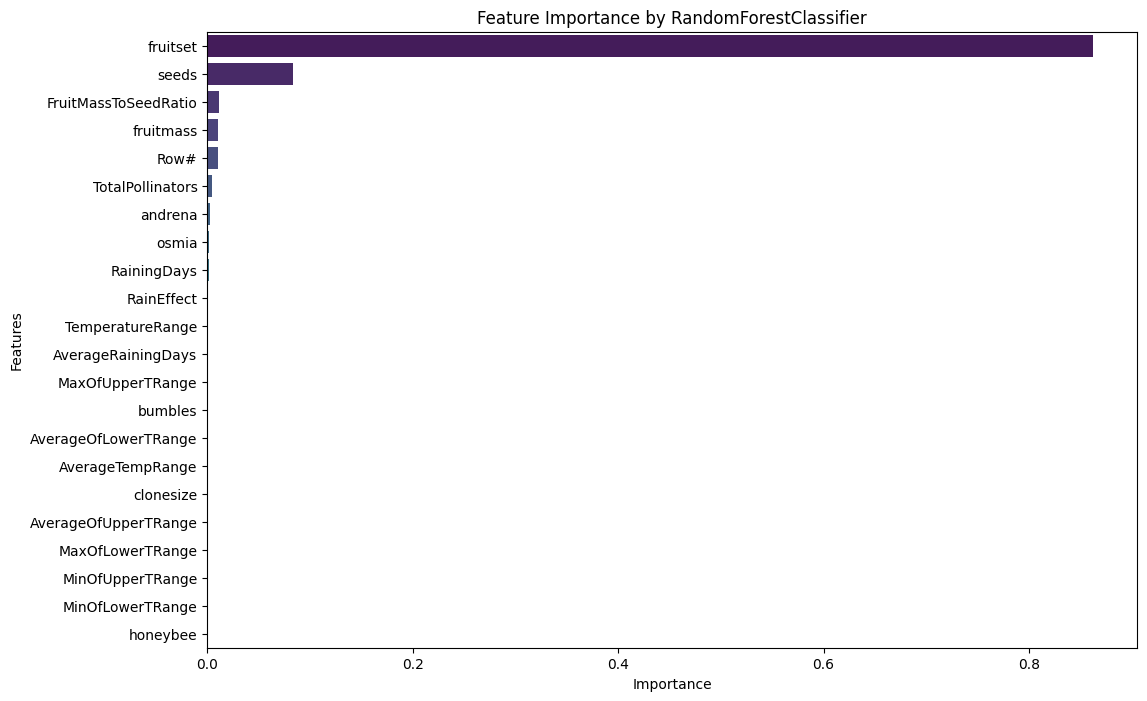

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# RandomForestClassifier modelini o'rgatish
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

# Xususiyatlarning muhimligini olish
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Muhimlik bo'yicha tartiblashtirish
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Histplot yordamida chizish
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance by RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9428\1600140701.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="Spectral")


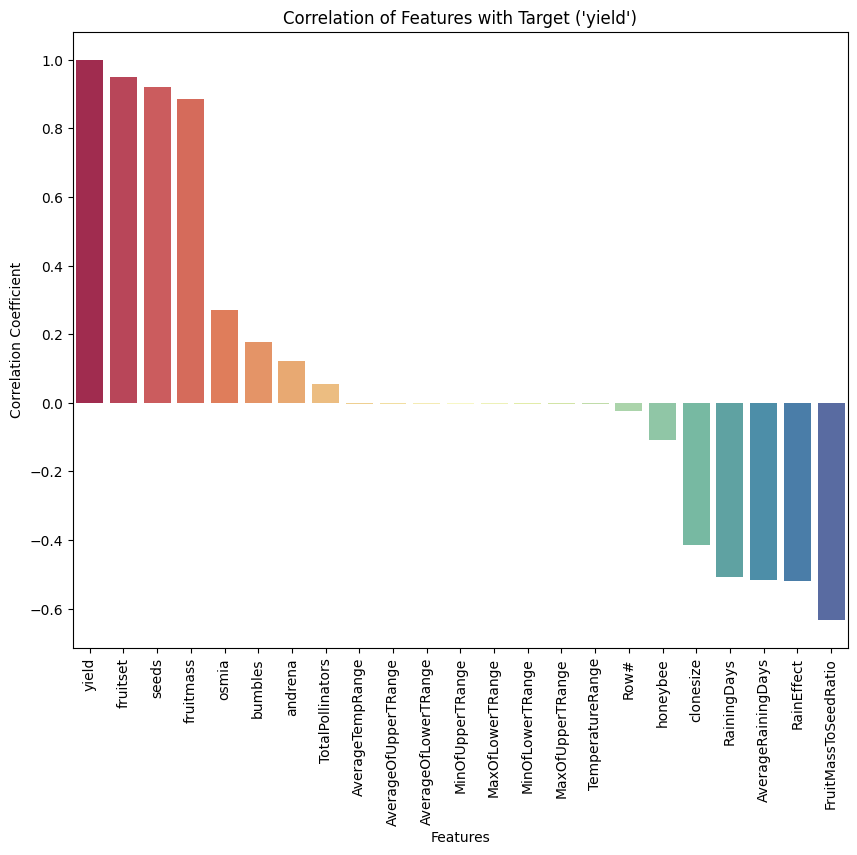

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation of each feature with 'yield'
correlations = data.corr()['yield'].sort_values(ascending=False)

# Visualize the correlations with a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette="Spectral")
plt.xticks(rotation=90)
plt.title("Correlation of Features with Target ('yield')")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()



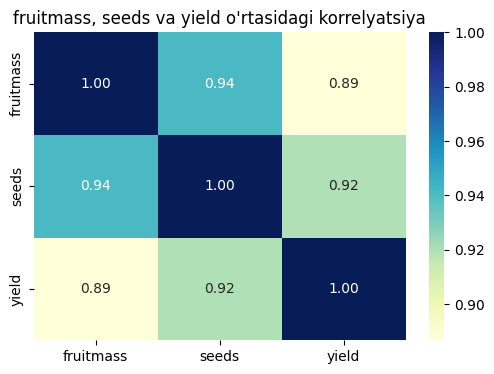

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# fruitmass va seeds ustunlarining yield bilan bog'liqligi
correlations = data[['fruitmass', 'seeds', 'yield']].corr()

# Issiqlik xaritasi orqali korrelyatsiyani ko'rsatish
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("fruitmass, seeds va yield o'rtasidagi korrelyatsiya")
plt.show()


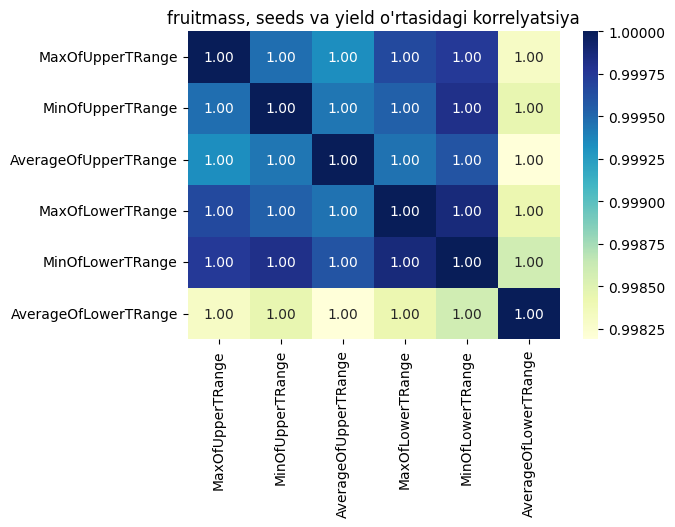

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# fruitmass va seeds ustunlarining yield bilan bog'liqligi
correlations = data[['MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange']].corr()

# Issiqlik xaritasi orqali korrelyatsiyani ko'rsatish
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("fruitmass, seeds va yield o'rtasidagi korrelyatsiya")
plt.show()
